Завдання 1 \
Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

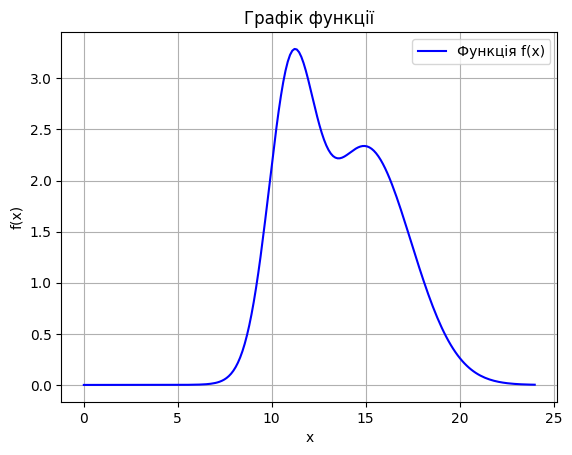

Невизначений інтеграл функції: 4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)
Інтеграл від 9 до 18: 20.051645014188296


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Оголошуємо змінну та функцію
x = sp.symbols('x')
f = 2 * (4 / (1.2 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 11) / 1.2)**2) +
         7 / (2.4 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 15) / 2.4)**2))

# Виводимо графік функції
x_values = np.linspace(0, 24, 200)
y_values = [sp.N(f.subs(x, val)) for val in x_values]  # Обчислюємо значення функції для кожної точки
plt.plot(x_values, y_values, label='Функція f(x)', color='blue')
plt.title('Графік функції')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Обчислюємо невизначений інтеграл функції
indefinite_integral = sp.integrate(f, x)
print("Невизначений інтеграл функції:", indefinite_integral)

# Порахуємо інтеграл
a = 9
b = 18
integral_ab = float(sp.integrate(f, (x, a, b)))
print("Інтеграл від {} до {}: {}".format(a, b, integral_ab))


Завдання 2

In [29]:
def rectangle_method_integration(f, a, b, n):
    dx = (b - a) / n
    integral = 0
    for i in range(n):
        x_left = a + i * dx
        x_right = a + (i + 1) * dx
        x_mid = (x_left + x_right) / 2
        integral += f.subs(x, x_mid) * dx
    return float(integral)

print(rectangle_method_integration(f, a, b, 200))


20.051778540188344


Завдання 3

In [30]:
def trapezoidal_rule_integration(f, a, b, n):
    dx = (b - a) / n
    integral = 0.5 * (f.subs(x, a) + f.subs(x, b))
    for i in range(1, n):
        x_i = a + i * dx
        integral += f.subs(x, x_i)
    integral *= dx
    return float(integral)

print(trapezoidal_rule_integration(f, a, b, 200))


20.051377963129596


Завдання 4

In [32]:
def simpsons_rule_integration(f, a, b, n):
    dx = (b - a) / n
    integral = f.subs(x, a) + f.subs(x, b)
    for i in range(1, n):
        x_i = a + i * dx
        if i % 2 == 0:
            integral += 2 * f.subs(x, x_i)
        else:
            integral += 4 * f.subs(x, x_i)
    integral *= dx / 3
    return float(integral)

print(simpsons_rule_integration(f, a, b, 200))

20.051645019199785


Завдання 5

In [42]:

from scipy.integrate import quad

# Функція для чисельного інтегрування
def integrand(x_val):
    return float(f.subs(x, x_val))

# Виконуємо чисельне інтегрування за допомогою quad
integral_ab_scipy, error = quad(integrand, a, b)

print("Чисельний інтеграл від {} до {}: {}".format(a, b, integral_ab_scipy))
print("Різниця точності від найменш точного методу до найбільш, де обрахунок через quad вважається абсолютно точним:")
print(float(abs(integral_ab_scipy - rectangle_method_integration(f, a, b, 200))))
print(float(abs(integral_ab_scipy - trapezoidal_rule_integration(f, a, b, 200))))
print(float(abs(integral_ab_scipy - simpsons_rule_integration(f, a, b, 200))))
print(float(abs(integral_ab_scipy - integral_ab)))

Чисельний інтеграл від 9 до 18: 20.0516450141883
Різниця точності:
0.00013352600004523651
0.00026705105870306056
5.011486337025417e-09
3.552713678800501e-15
